#                                     Apprentissage Automatique 1
                                            TP N°4 – Régression Logistique

1. Importer les bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

2. Lire la base de données avec pandas

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


3. Afficher la longueur (nombre d’enregistrements) de la base de données

In [4]:
len(df)

768

4. Afficher les 10 premières lignes de la base de données

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


5. Afficher les informations et une description du datase

In [6]:
print("les informations de la base de données sont:",df.info())
print("================================================")
print("la description de la base de donnees est :",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
les informations de la base de données sont: None
la description de la base de donnees est :        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.00000

6. Préciser les entrées X du classifieur Régression logistique et la sortie y

In [7]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
Y=df.iloc[:,-1]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

7. Chercher les valeurs IsNan et tracer le graphe nécessaire en utilisant la fonction :
#heatmap(arguments)

In [9]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


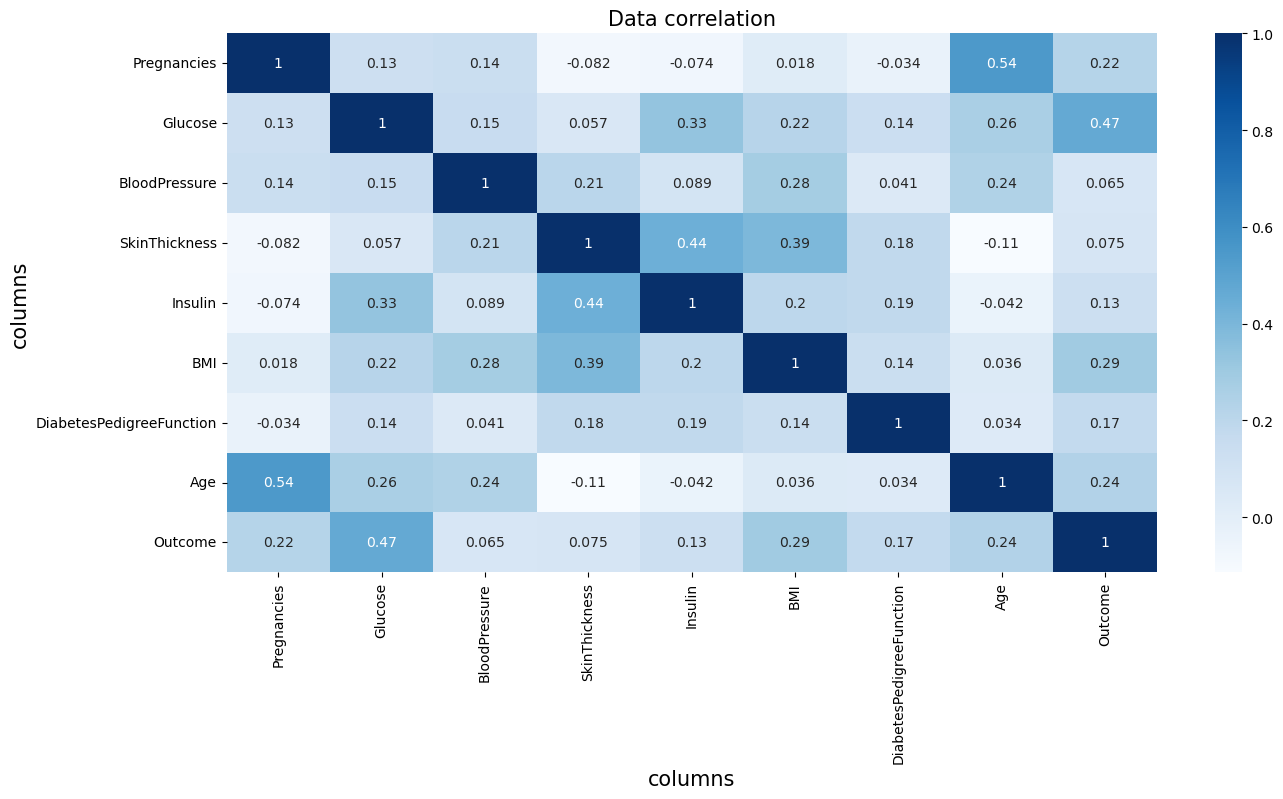

In [10]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title('Data correlation',size=15)
plt.ylabel('columns',size=15)
plt.xlabel('columns',size=15)
plt.show()

8. Tracer le graphe qui montre la distribution des personnes ceux ayant la maladie diabètes et celles n’ayant pas, en utilisant la fonction : countplot(argument)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

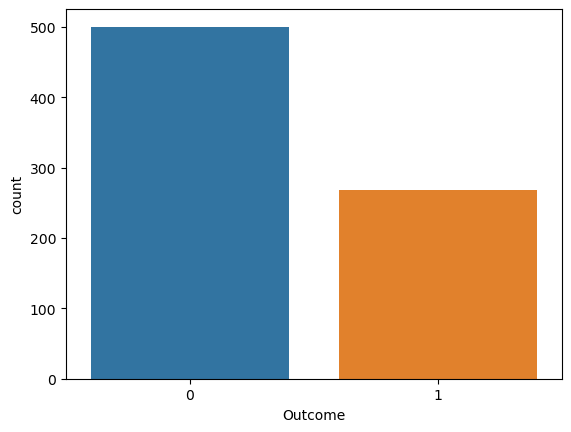

In [11]:
sns.countplot(x ='Outcome', data = df)

9. Tracer la distribution de l’Age par la fonction : distplot(argument)

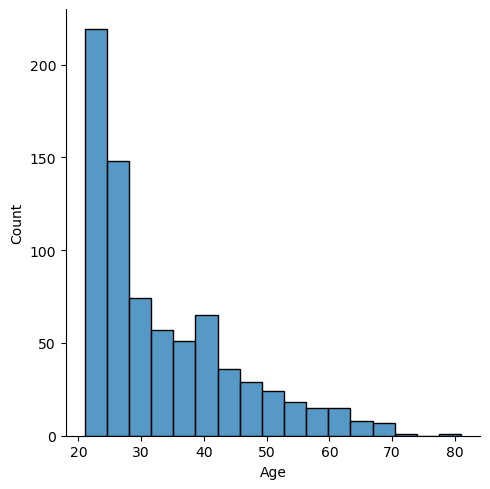

In [12]:
sns.displot(x ='Age', data = df)

10. Afficher la matrice de corrélation sous forme d’un tableau

In [13]:
correlation_matrix = np.corrcoef(df, rowvar=False)
correlation_matrix 

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.03352267,  0.54434123,  0.22189815],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.1373373 ,  0.26351432,  0.4665814 ],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.04126495,  0.23952795,  0.06506836],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.18392757, -0.11397026,  0.07475223],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18507093, -0.04216295,  0.13054795],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.14064695,  0.03624187,  0.29269466],
       [-0.03352267,  0.1373373 ,  0.04126495,  0.18392757,  0.18507093,
         0.14064695,  1.        ,  0.03356131,  0.17384407],
       [ 0.54434123,  0.26351432,  0.23952795, -0.11397026, -0

11. Afficher la distribution de toutes les variables du dataset : sns.pairplot(argument)

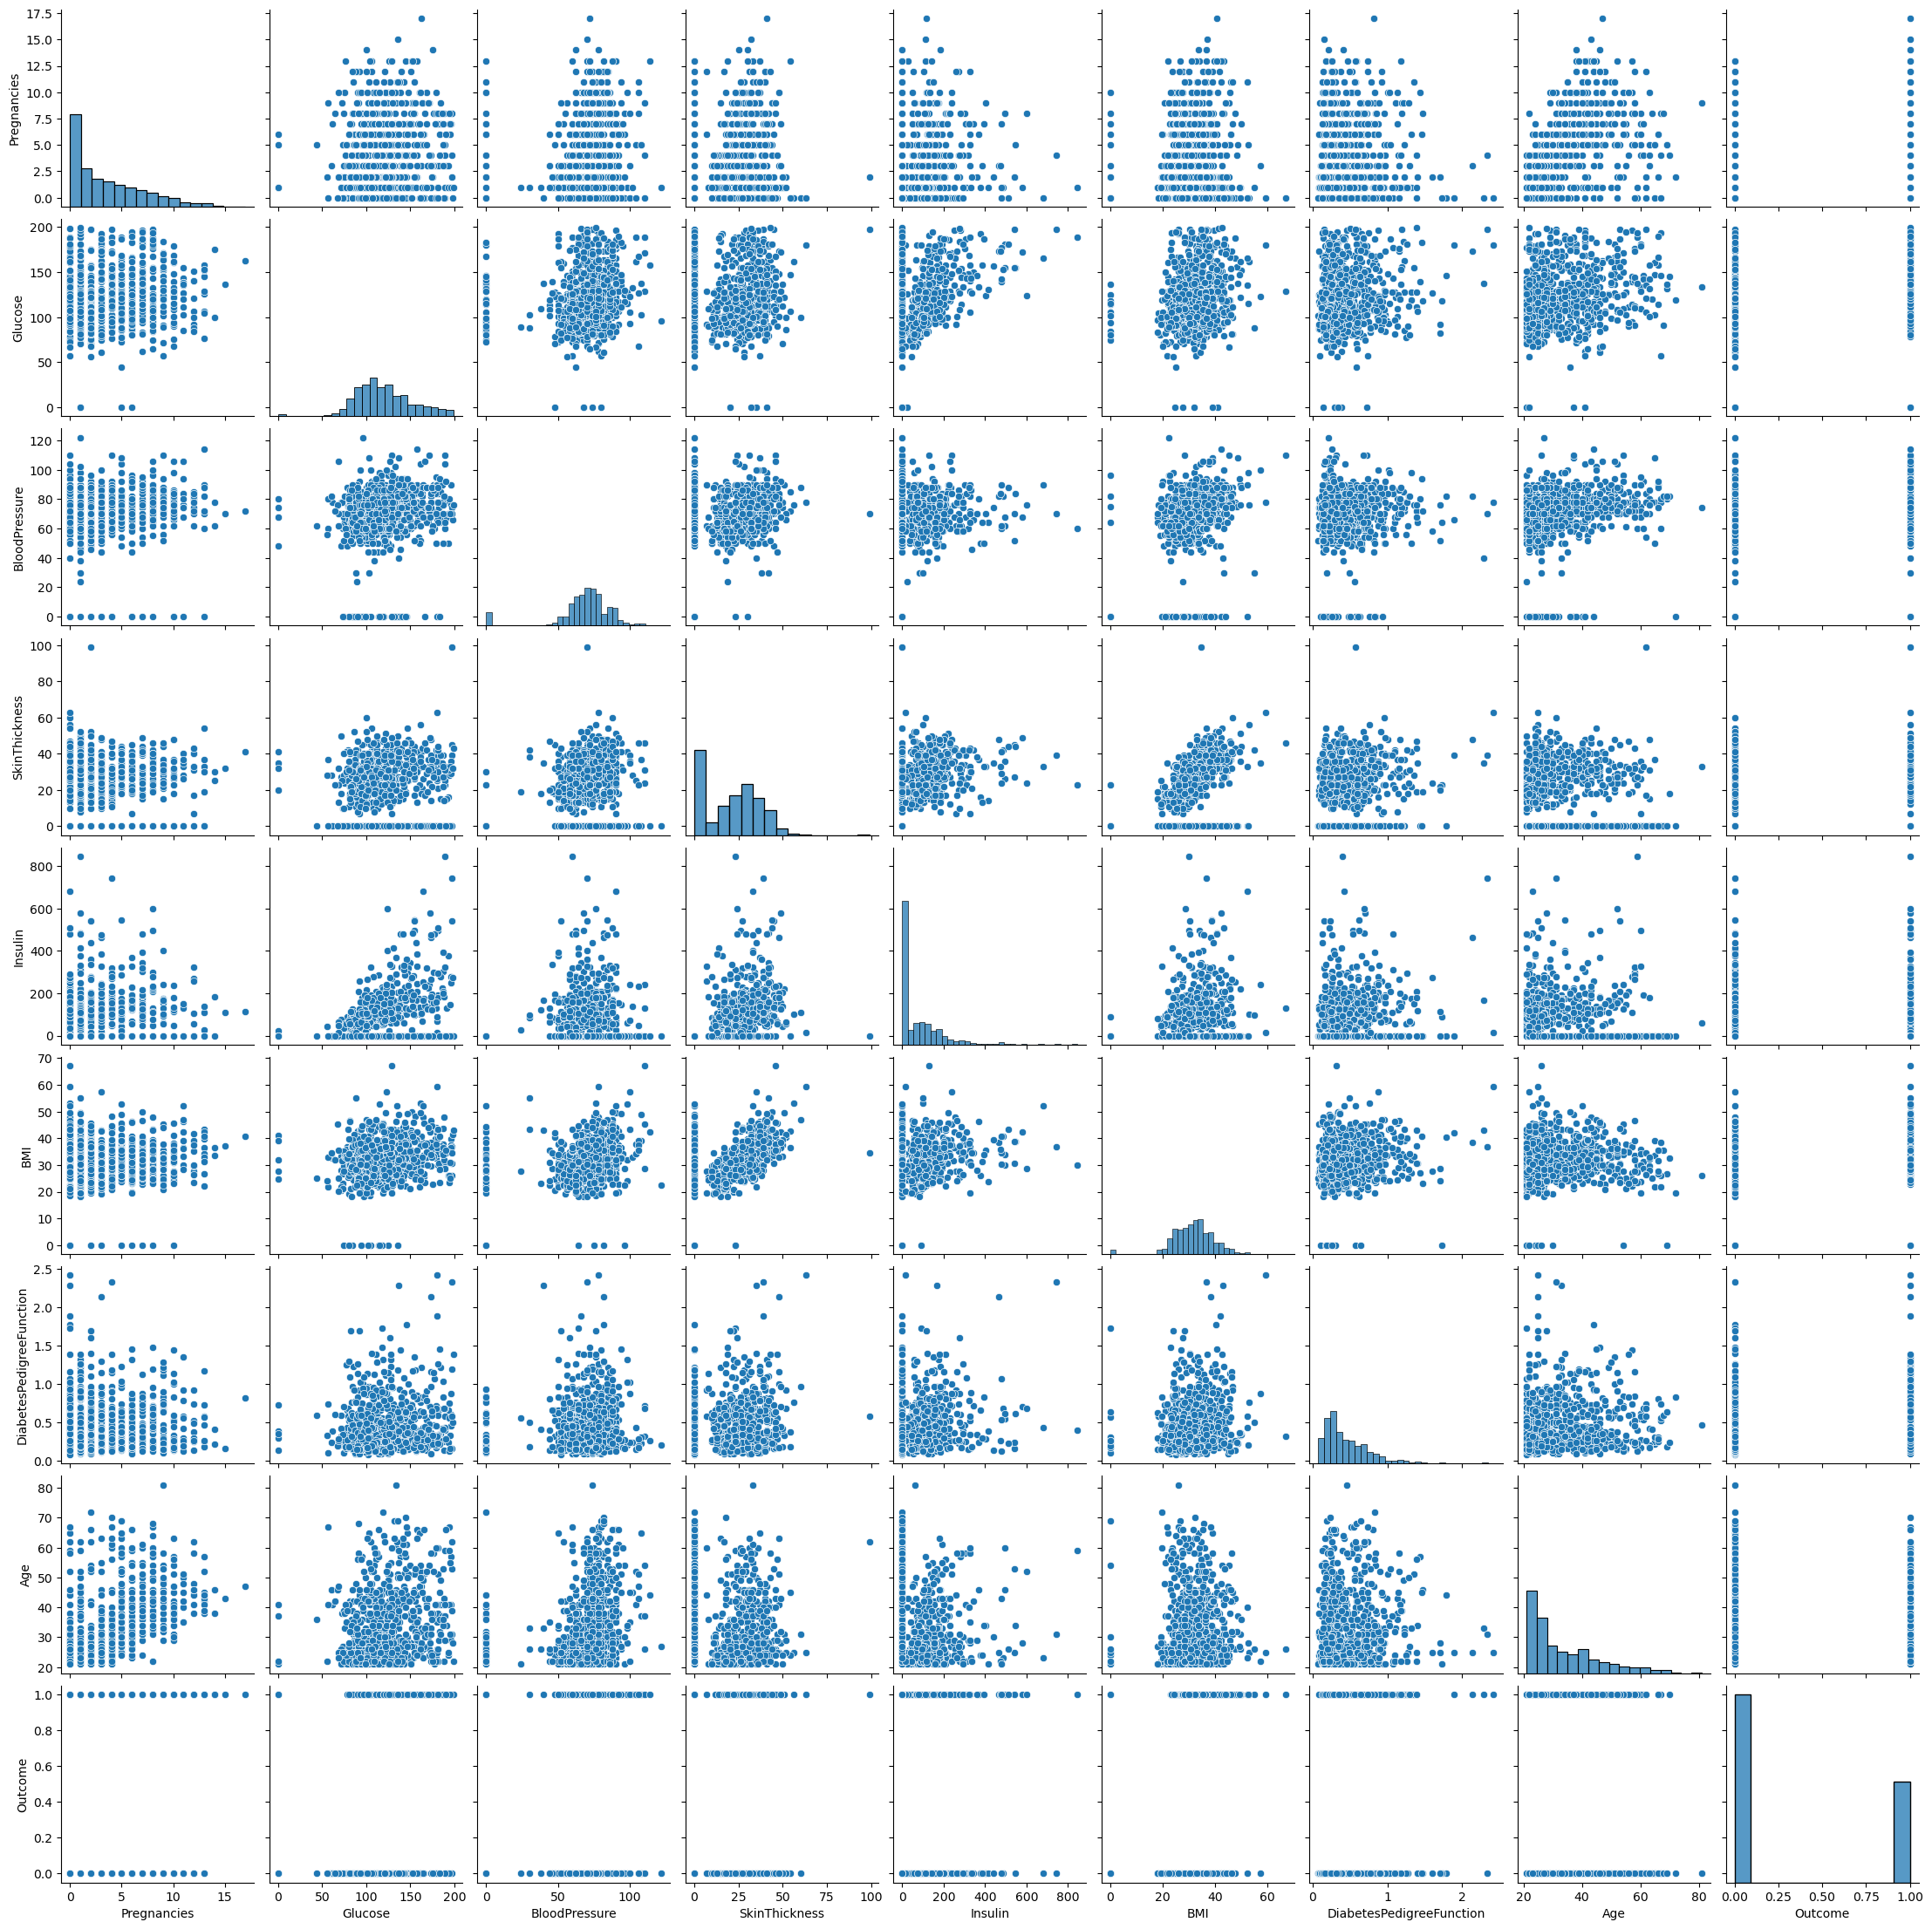

In [14]:
sns.pairplot(data=df)

11. Afficher la distribution de toutes les variables du dataset : sns.pairplot(argument)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

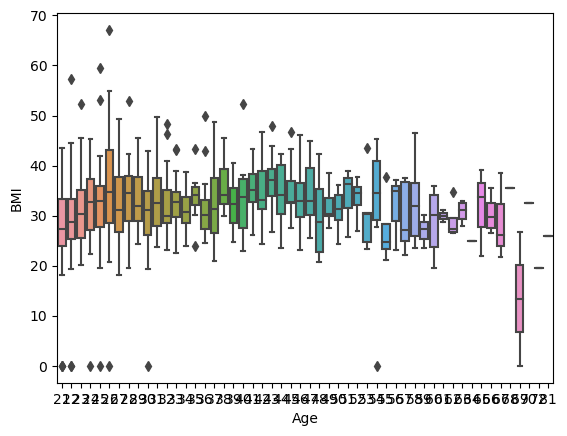

In [15]:
sns.boxplot(data=df,x='Age',y='BMI')

13. Diviser la base de données en 2 parties : apprentissage (80% du nombre total des
enregistrements) et test (20%). Utiliser la fonction train_test_split.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

14. Appliquer l’apprentissage automatique.

In [18]:
model=LogisticRegression()
model.fit(x_train,y_train)

F:\Nouveau dossier\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

15. Calculer la prediction

In [19]:
predictions=model.predict(x_test)
print(predictions)

[0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0]


16. Afficher le rapport de la classification.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score


In [21]:
print(classification_report(y_test,predictions,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.67      0.69      0.68        48
           0       0.86      0.85      0.85       106

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [22]:
b=f1_score(y_test, predictions)
print('F1-score :',b)


F1-score : 0.6804123711340205


17. Calculer la matrice de confusion

In [23]:
matrice=confusion_matrix(y_test,predictions)

In [24]:
matrice

array([[90, 16],
       [15, 33]], dtype=int64)

18. Calculer l’accuracy_score.

In [25]:
c=accuracy_score(y_test, predictions)
print('la précision :',c)

la précision : 0.7987012987012987


19. Afficher la matrice de confusion sous cette forme :

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrice,display_labels=model.classes_)

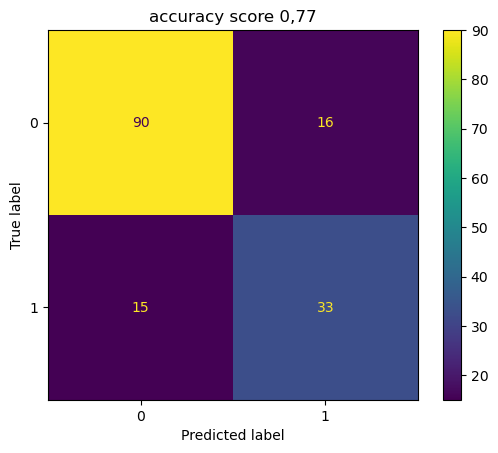

In [27]:

disp.plot()
plt.title("accuracy score 0,77")

plt.show()

# TP5_Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions2=model.predict(x_test)
predictions2

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [39]:
b=accuracy_score(y_test, predictions2)
print('accuracy-score :',b)

accuracy-score : 0.7662337662337663


In [36]:
matrice=confusion_matrix(y_test,predictions2)
matrice

array([[82, 24],
       [12, 36]], dtype=int64)

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrice,display_labels=model.classes_)

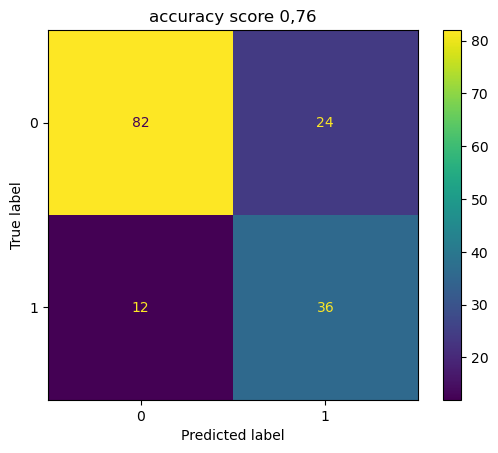

In [40]:

disp.plot()
plt.title("accuracy score 0,76")

plt.show()

In [41]:
rapport=classification_report(y_test,predictions2)
rapport

'              precision    recall  f1-score   support\n\n           0       0.87      0.77      0.82       106\n           1       0.60      0.75      0.67        48\n\n    accuracy                           0.77       154\n   macro avg       0.74      0.76      0.74       154\nweighted avg       0.79      0.77      0.77       154\n'

[Text(0.4801623774509804, 0.9666666666666667, 'Glucose <= 127.5\ngini = 0.46\nsamples = 614\nvalue = [394, 220]\nclass = 0'),
 Text(0.18397671568627452, 0.9, 'Age <= 28.5\ngini = 0.321\nsamples = 393\nvalue = [314, 79]\nclass = 0'),
 Text(0.07230392156862746, 0.8333333333333334, 'BMI <= 30.95\ngini = 0.171\nsamples = 222\nvalue = [201, 21]\nclass = 0'),
 Text(0.029411764705882353, 0.7666666666666667, 'Pregnancies <= 7.5\ngini = 0.032\nsamples = 122\nvalue = [120, 2]\nclass = 0'),
 Text(0.0196078431372549, 0.7, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 121\nvalue = [120, 1]\nclass = 0'),
 Text(0.00980392156862745, 0.6333333333333333, 'gini = 0.0\nsamples = 107\nvalue = [107, 0]\nclass = 0'),
 Text(0.029411764705882353, 0.6333333333333333, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = 0'),
 Text(0.0196078431372549, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.0392156862745098, 0.56666666666

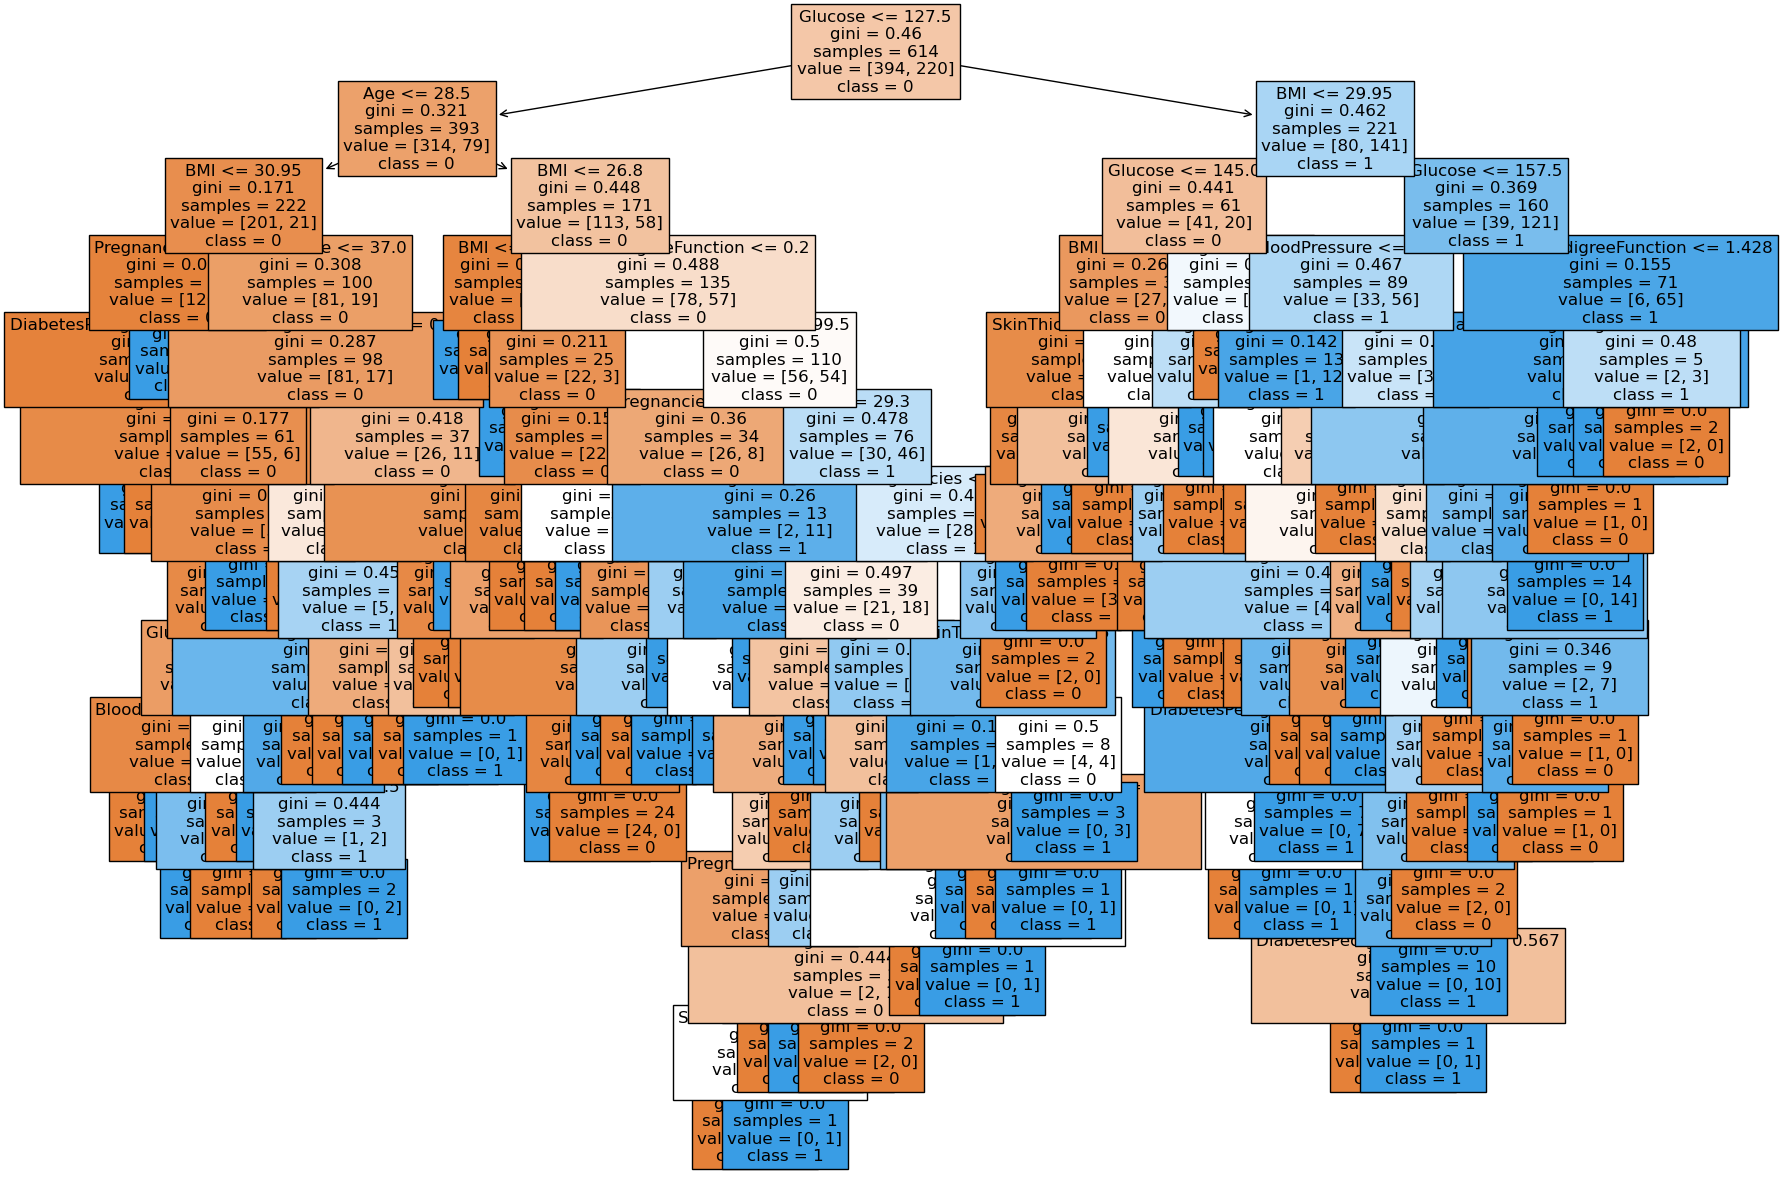

In [46]:
#Q16
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(model,feature_names=df.columns,fontsize=12,filled=True,class_names=['0','1'])